In [110]:
%matplotlib notebook

In [111]:
from sqlalchemy import create_engine
import urllib.parse
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [112]:
#Import db connection parameters from json file
with open('databaseconfig.json') as json_data_file:
         data = json.load(json_data_file)

In [113]:
#Open DB connection
conexion_string = f'postgresql://{data["mysql"]["user"]}:{data["mysql"]["passwd"]}@{data["mysql"]["host"]}/{data["mysql"]["db"]}'

engine = create_engine(conexion_string)


In [114]:
#query average salary by position
query = "select tit.title, avg(sal.salary::numeric) "
query += "from titles as tit "
query += "inner join salaries as sal on tit.emp_no = sal.emp_no "
query += "group by tit.title;"

result = connection.execute(query)
print(result)

In [115]:
#creating pandas dataframe from query to show average salary by position
query_df = pd.read_sql_query(query, engine)
query_df.head()

,title,avg
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614


<IPython.core.display.Javascript object>


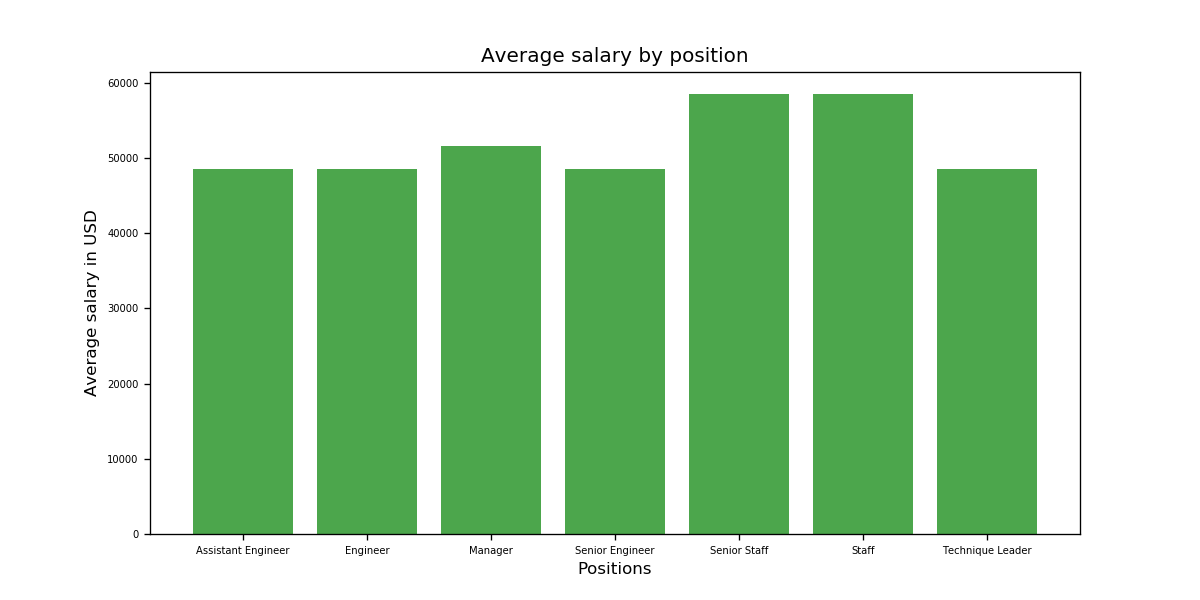

In [135]:
#Creating a bar chart and setting its parameters
positions = query_df["title"]
salaries = query_df["avg"]
x_axis = np.arange(len(salaries))

f, ax = plt.subplots(figsize=(10,5))
plt.bar(positions, salaries, color="g", alpha=0.7, align="center", width=0.8)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, positions)


plt.xlim(-0.75, len(x_axis)- 0.25)
plt.xticks(rotation=0, fontsize=6)
plt.yticks(fontsize=6)

plt.title("Average salary by position")
plt.xlabel("Positions")
plt.ylabel("Average salary in USD")

plt.show()